# Spain Case Study

In [4]:
# Required packages to run the script
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticke
import seaborn as sns

from matplotlib.colors import LogNorm
import math
import os
import pickle as pkl
from scipy import sparse
from scipy.sparse.linalg import lsqr
import scipy.fftpack
import xlsxwriter
import importlib
import plotly.express as px
import plotly.graph_objects as go


In [5]:
# Importing functions 
from import_excel import import_excel

from calc_translations import calculate_all_translations
from wavelet_decomposition import compute_wavelet_coefficient_betas
from wavelet_decomposition import preplotprocessing
from wavelet_decomposition import reconstruct

from plots import plot_betas_heatmap
from plots import plot_EPN
from calc_EPN import calc_epn
from plots import fft
from miscelaneous_functions import create_directory

### Importing Time Series

In [6]:
# Specipy the number of data per day of your time serie : dpd
# Specipy the number of day per year of your time serie : dpy
dpd = 24 # data per day
dpy = 365 # data per year :  cut the leap years to 365 years


# Signals can then be interpotated (within import_excel function)to a greater number of data per day (ndpd).This is useful for the wavelet decomposition to obtain daughter wavelets of th proper length.
ndpd = 64 # new data per year (for the interpolation). Minimum number so that the shortes wavelet has 2 data.
signal_length = ndpd * dpy

#
# Directory path
path_input_data = 'input_time_series/'
file_name = 'Spain/Espagne_load_entsoe_2021.xlsx'

In [7]:
Load_ts = import_excel(path_input_data,file_name, 
                                    dpd ,ndpd, dpy, 
                                    interp=True) # interpolate data from dpd to ndpd numper of points per day

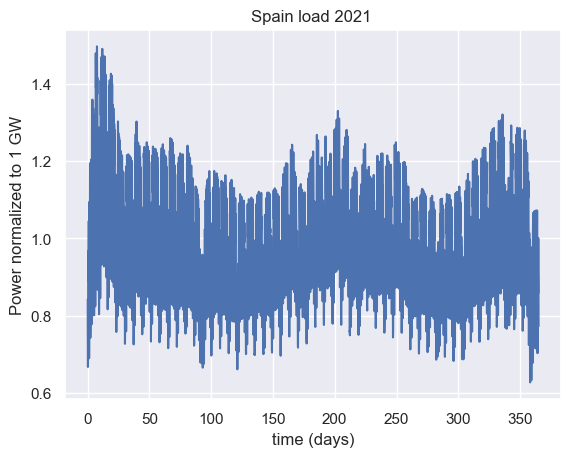

In [8]:
sns.set() # Set upa nice layout for all plots
time = np.arange(0,2*dpy,1./(ndpd))
time = np.arange(0,dpy,1./(ndpd))
plt.figure()
plt.plot(time, Load_ts)
plt.title('Spain load 2021 ')
plt.xlabel('time (days)')
plt.ylabel('Power normalized to 1 GW')
plt.show()


In [ ]:
# Create a Plotly figure
fig = go.Figure()

fig.add_trace(go.Scatter(x=time, y=Load_ts, mode='lines', name='Spain'))
fig.update_layout(title='Load 2021', xaxis_title='Day', yaxis_title='Power')

# Show the plot
fig.show()

In [16]:

# Specipy the number of data per day of your time serie : dpd
# Specipy the number of day per year of your time serie : dpy
dpd = 4 # data per day
dpy = 365 # data per year :  cut the leap years to 365 years


# Signals can then be interpotated (within import_excel function)to a greater number of data per day (ndpd).This is useful for the wavelet decomposition to obtain daughter wavelets of th proper length.
ndpd = 64 # new data per year (for the interpolation). Minimum number so that the shortes wavelet has 2 data.
signal_length = ndpd * dpy

#
# Directory path
path_input_data = 'input_time_series/'

file_name = 'Spain/Solar_generation_ES_2021_intermittent.xlsx'
PV_ts = import_excel(path_input_data,file_name, 
                                    dpd ,ndpd, dpy, 
                                    interp=True) # interpolate data from dpd to ndpd numper of points per day

AssertionError: import_excel : Data does not cover an integer number of days

In [14]:
pd.read_excel(path_input_data+file_name)

,ES/solar
0,9.500000e+03
1,1.333333e+04
2,3.186667e+06
3,1.968667e+06
4,5.650000e+04
...,...
1456,8.316667e+04
1457,5.700000e+04
1458,4.976333e+06
1459,3.902833e+06


## Non thermosensitive part

8760


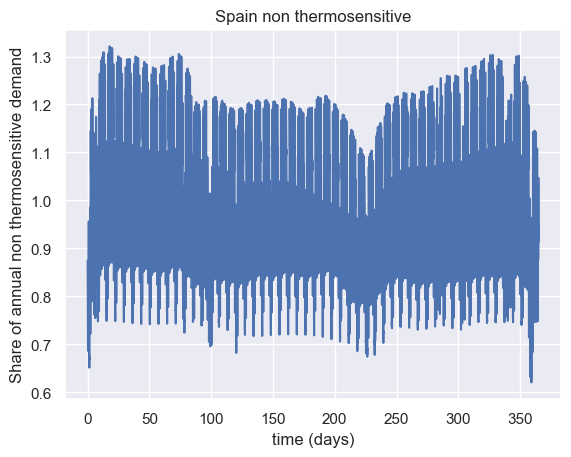

In [36]:
# Specipy the number of data per day of your time serie : dpd
# Specipy the number of day per year of your time serie : dpy
dpd = 24 # data per day
dpy = 365 # data per year :  cut the leap years to 365 years


# Signals can then be interpotated (within import_excel function)to a greater number of data per day (ndpd).This is useful for the wavelet decomposition to obtain daughter wavelets of th proper length.
ndpd = 64 # new data per year (for the interpolation). Minimum number so that the shortes wavelet has 2 data.
signal_length = ndpd * dpy

# Directory path
path_input_data = 'input_time_series/'
file_name = 'Spain/ES_non_thermosensitive_osmose.xlsx'

Load_ts_ES_non_therm = import_excel(path_input_data,file_name, 
                                    dpd ,ndpd, dpy, 
                                    interp=True) # interpolate data from dpd to ndpd numper of points per day

sns.set() # Set upa nice layout for all plots
time = np.arange(0,dpy,1./(ndpd))
plt.figure()
plt.plot(time, Load_ts_ES_non_therm)
plt.title('Spain non thermosensitive')
plt.xlabel('time (days)')
plt.ylabel('Share of annual non thermosensitive demand')
plt.show()

## EV part 

8760


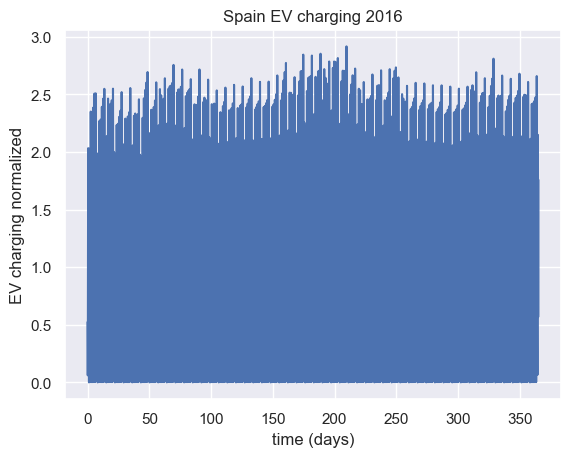

In [37]:
# Specipy the number of data per day of your time serie : dpd
# Specipy the number of day per year of your time serie : dpy
dpd = 24 # data per day
dpy = 365 # data per year :  cut the leap years to 365 years


# Signals can then be interpotated (within import_excel function)to a greater number of data per day (ndpd).This is useful for the wavelet decomposition to obtain daughter wavelets of th proper length.
ndpd = 64 # new data per year (for the interpolation). Minimum number so that the shortes wavelet has 2 data.
signal_length = ndpd * dpy

# Directory path
path_input_data = 'input_time_series/'
file_name = 'Spain/ES_ev_charging_osmose_2016.xlsx'

Load_ts_ES_ev = import_excel(path_input_data,file_name, 
                                    dpd ,ndpd, dpy, 
                                    interp=True) # interpolate data from dpd to ndpd numper of points per day

sns.set() # Set upa nice layout for all plots
time = np.arange(0,dpy,1./(ndpd))
plt.figure()
plt.plot(time, Load_ts_ES_ev)
plt.title('Spain EV charging 2016')
plt.xlabel('time (days)')
plt.ylabel('EV charging normalized')
plt.show()

## Heating coefficient

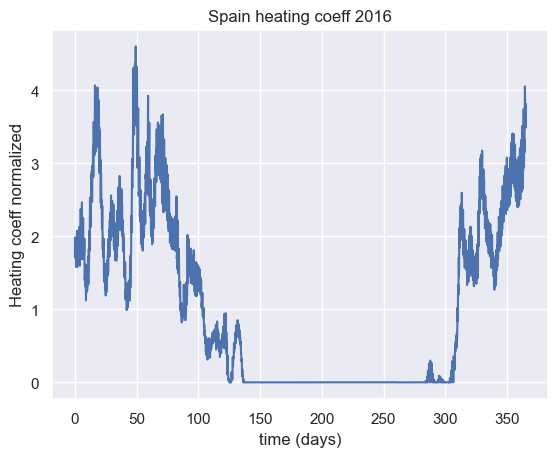

In [4]:
# Specipy the number of data per day of your time serie : dpd
# Specipy the number of day per year of your time serie : dpy
dpd = 24 # data per day
dpy = 365 # data per year :  cut the leap years to 365 years


# Signals can then be interpotated (within import_excel function)to a greater number of data per day (ndpd).This is useful for the wavelet decomposition to obtain daughter wavelets of th proper length.
ndpd = 64 # new data per year (for the interpolation). Minimum number so that the shortes wavelet has 2 data.
signal_length = ndpd * dpy

# Directory path
path_input_data = 'input_time_series/'
file_name = 'Spain/ES_heating_coeff_osmose_2016.xlsx'

Load_ts_ES_hc = import_excel(path_input_data,file_name, 
                                    dpd ,ndpd, dpy, 
                                    interp=True) # interpolate data from dpd to ndpd numper of points per day

sns.set() # Set upa nice layout for all plots
time = np.arange(0,dpy,1./(ndpd))
plt.figure()
plt.plot(time, Load_ts_ES_ev)
plt.title('Spain heating coeff 2016')
plt.xlabel('time (days)')
plt.ylabel('Heating coeff normalized')
plt.show()

# Starting the wavelet decomposition

<br />

Signal is decomposed over a set of wavelets of 15 time scales :  [0.75, 1.5, 3., 6., 12, 24., 42., 84., 168., 273.75, 547.5, 1095., 2190., 4380.,
              8760.] hours
              
The time scale could be understood as the duration of charge-discharge of a storage device

<br />

<ins>This set of wavelets is built such that:</ins>



- There is 3 mother wavelets with different durations : _Year_ , _Week_ and _Day_
<br />

- Those 3 wavelets have a physical meaning and account for human and season cycles. Therefore, we want to make sure that the year time scale is properly center over the year (summer un summer and winter in winter), that dayly wavelets are starting from 12pm to 12 pm and not 5am to 5am,...
<br />

- For this  reason we should compute and use translations, as shown in the cell below
<br />

- The mother wavelets are then divided in daugther wavelets

<br />

The 3 mother wavelets have to be adjusted on the signal: the _year_ should fit on the seasonal fluctuation, the _week_ on the week and weekend cycle, the _day_ on the nigh / day cycle
    * Translations are computed with the "Consumption signal" for each year
    * The same translations are reused for for the other time series

## Definition of the wavelet decomposition parameters

There are 3 mother wavelets of different timescale :
 * Year
 * Week
 * Day

They have been chosen beacause the reflect either human rythmes and/or nadural cycles : day and night, winter/summer, weekend and week days, etc.

Each of those mother wavelets are divided into shorter wavelets, as defined below :

In [8]:
#
# Options of the wavelet decomposition
vy = 6  # number of vectors per years (child wavelets)
vw = 3  # vectors per week
vd = 6  # vectors per day
#
# Time scales of the wavelet decomposition
# We define here the 15 time steps of the 'rich disctionnary' wavelets
time_scales = [0.75, 1.5, 3., 6., 12, 24., 42., 84., 168., 273.75, 547.5, 1095., 2190., 4380.,
              8760.] # cycles length, in hours

### Presentation of the translate_mother_wavelets() function:

- Each mother wavelet needs to be translated to make sure that they are properly overlaping the right period : a day must strat at midnigh, a week on monday, the year in between the winter/summer season.

In [5]:
# ----------------------------------
# ------ Translations ------------
# ----------------------------------
'''
To perform a wavelet decomposition :
- We first need to compute or import translations. The calculatio could take a while...

To compare different time series (PV, Wind, electricity consumption), the translation should rather be calculated on the electricity consumption signal.
'''
# Check if the file exists
translation_name = 'Spain_heating_coeff_2021'
translation_results_root = 'translation_calculation_results/' + translation_name 

path_trans = translation_results_root + '/translation/'
create_directory(path_trans)
path_matrix = translation_results_root + '/matrix/'
create_directory(path_matrix)

wl_shape = 'square' # 'square' or 'sine_function' : shape of the wavelet. Per default, choose square. The sine function is just here to play around.
input_data = Load_ts_ES_hc


trans = calculate_all_translations(path_trans, translation_name,
                                   ndpd, dpy, input_data, wl_shape='square', 
                                   recompute_translation= False)



Directory 'translation_calculation_results/Spain_heating_coeff_2021/translation/' created successfully.
Directory 'translation_calculation_results/Spain_heating_coeff_2021/matrix/' created successfully.
Computing translation...
0
28731.931215863307
3209
28727.62267107494
3210
28722.557402343864
3211
28717.42428353763
3212
28712.232730568612
3213
28707.001850817232
3214
28701.731524912593
3215
28696.44502254054
3216
28691.154017162255
3217
28685.858515615448
3218
28680.590561875986
3219
28675.350277636135
3220
28670.15369030593
3221
28665.03282546688
3222
28659.987966384273
3223
28655.03240594117
3224
28650.172975191545
3225
28645.410005805545
3226
28640.752907534075
3227
28636.20202585343
3228
28631.753296452098
3229
28627.398224017146
3230
28623.137092389115
3231
28618.947360405087
3232
28614.817817592048
3233
28610.748638823316
3234
28606.721703987976
3235
28602.73713479218
3236
28598.793493860714
3237
28594.887778092812
3238
28591.020093254585
3239
28587.18810783131
3240
28583.39070

In [10]:
# ----------------------------------------------------
# ------ Performing wavelet decomposition ------------
# ----------------------------------------------------
'''
Second, we compute the coefficients of the wavelet decomposition
- wl_shape : either 'sine' or 'square' shape -> l'option 'sine' est plutôt un jouet et n'a pas un intérêt immédiat.
- To compute new matrix use imp_matrix = False. It can take quite some time !
- Years can either be a list of string (e.g. ['2021', '2022']) or equal to None. I this case, il will be automatically replaced by ['0', '1']
'''
beta_path = 'results_decomposition_coefficient/'

stacked_betas, per_year_betas = compute_wavelet_coefficient_betas(input_data,
                 vy, vw, vd, dpy, ndpd,
                 trans,
                 path_matrix,
                 beta_path, wl_shape ='square', imp_matrix = True,
                 years = None)



# [stacked_betas, per_year_betas] = pkl.load(open('betas_saved_square' + '.p', "rb"))

Directory 'results_decomposition_coefficient/' already exists.
0 0
translation_calculation_results/Spain_2021/matrix/A_0.npz
Importing matrix A square
Square sparsee matrix or year 0 has been imported


In [11]:
# df = preplotprocessing(vy, vw , vd, ndpd, dpy, signal, #Then the kind of signal. In this tutorial its either 'Consommation', 'Eolien' or 'Solaire
#                       year, years,
#                       saved_sheets_square, # Here is the datasheet you want to plot. This datasheet is returned by the function compute_betas(). Here is ploted the square decomposition
#                       do_trans = None) # Eventualy retranslate the decomposition to make it feet to the week, day and sesonal cycles
# plot_betas_heatmap(df, signal, year , ndpd,
#                       cmin= -0.1,
#                       cmax= 0.1,
#                     ccenter = None)

# Plots


## Heatmaps

<br />

The wavelet decomposition can be depicted with a heatmaps.

<br />

Example in the cells below

['0']
Selected Year for heatmap plot: 0
Total number of year: ['0']


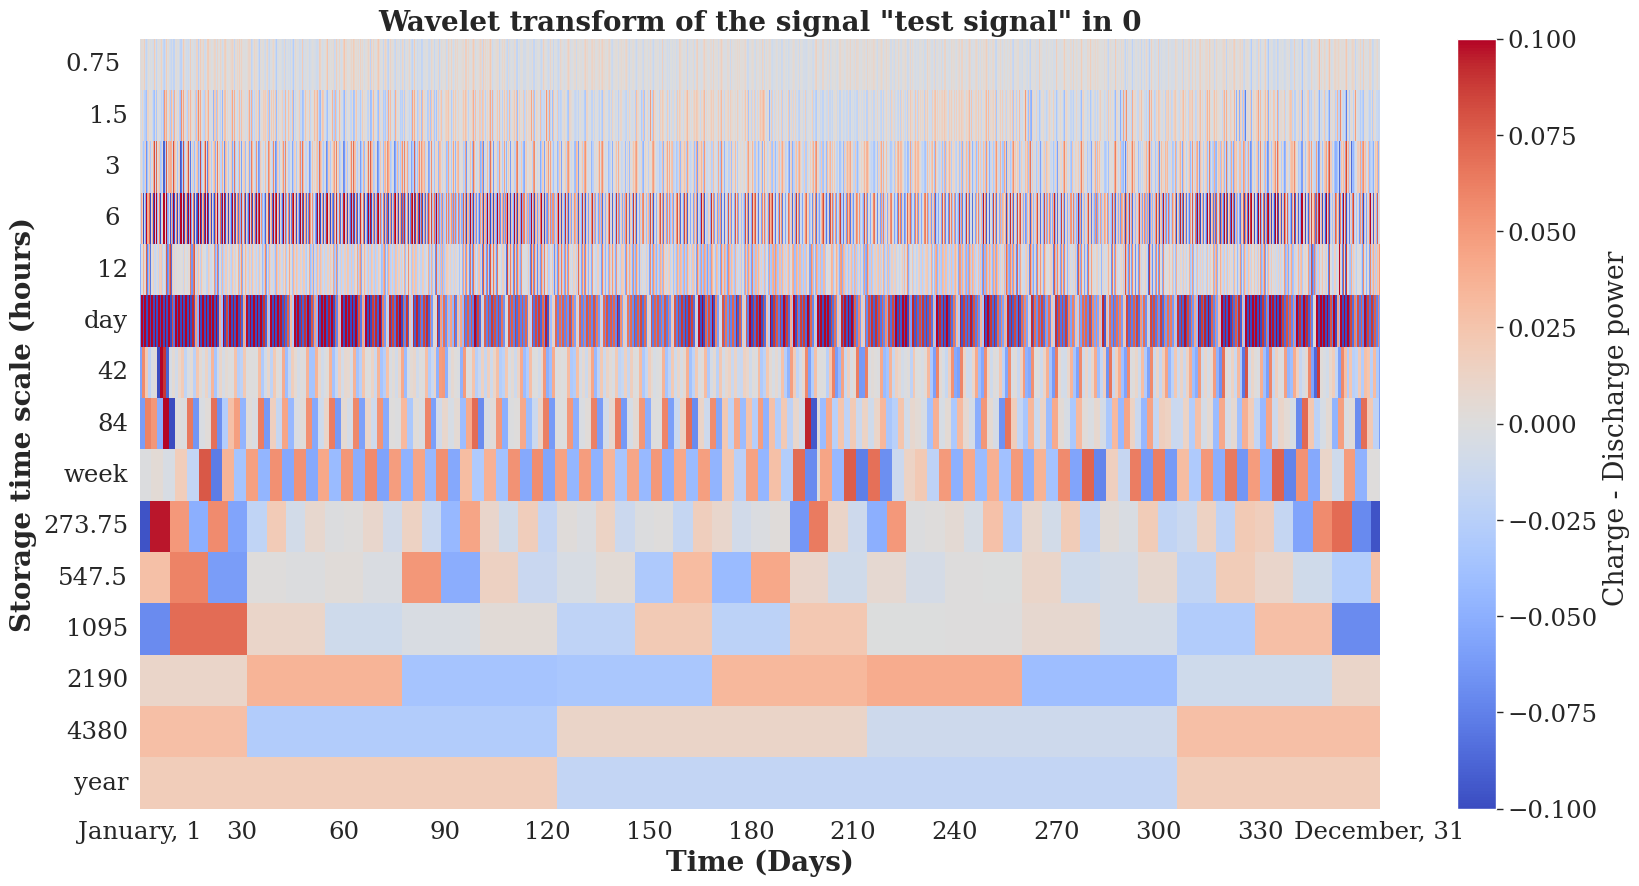

In [12]:
list_of_keys = list(per_year_betas.keys())
print(list_of_keys)

# First, select the year that must be plotted
year = list_of_keys[0]
years = list_of_keys
print("Selected Year for heatmap plot:", year)
print("Total number of year:", list_of_keys)

name = 'test signal' # Name printed in the heatmap title

# The directory where the matrix is saved. In this case, we are using square matric
# Replace square by sine for the sine wavelet decomposition


matrix_name = 'A_'+ year+'.npz'

A_sparse  = sparse.load_npz(path_matrix + matrix_name)
A = sparse.csr_matrix.todense(A_sparse)
matrix = np.asarray(A)

df = preplotprocessing(vy, vw , vd, ndpd, dpy, 
                      year, years,
                      time_scales,
                      per_year_betas, # Here is the datasheet you want to plot. This datasheet is returned by the function compute_betas(). Here is ploted the square decomposition
                      matrix)

plot_betas_heatmap(df, name , year , ndpd,
                      cmin= -0.1,
                      cmax= 0.1,
                    ccenter = None)

# Wavelet _Versus_ Fourier transform

In [44]:
# year='2' # year of the decomposition
# index = years.index(year)



input_data = Load_ts[0:365*64]
fft(ndpd, dpy, signal, year, input_data)

NameError: name 'signal' is not defined

# Computing Energy, Power, and Nb of Cycles
<br/>

### From the coefficients betas of the wavelet decomposition, we can determine the flexibility required by the energy system

<br/>

***Satisfaction rate:*** Percentage of the time the consumption is satisfied. Examples:
* If satisfaction rate = 90%: At the day scales 0.9*365=328 days per year, the energy demand will be satisfied. We get rid of the 365-328=37 days with the highest electricity consumption
* Here the signal last 7 years. With a 90% satisfaction rate we get rid of the 37*7 extreme days over the last 7 years

Calculations are made on a 1 years dataset


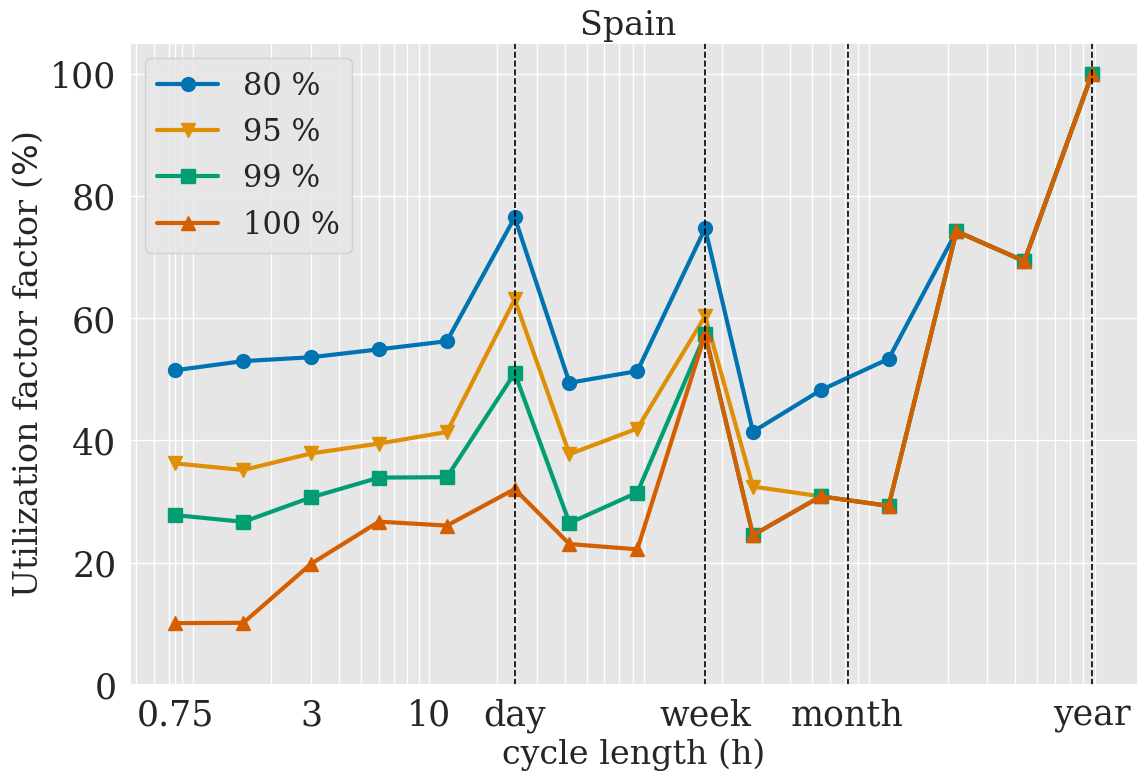

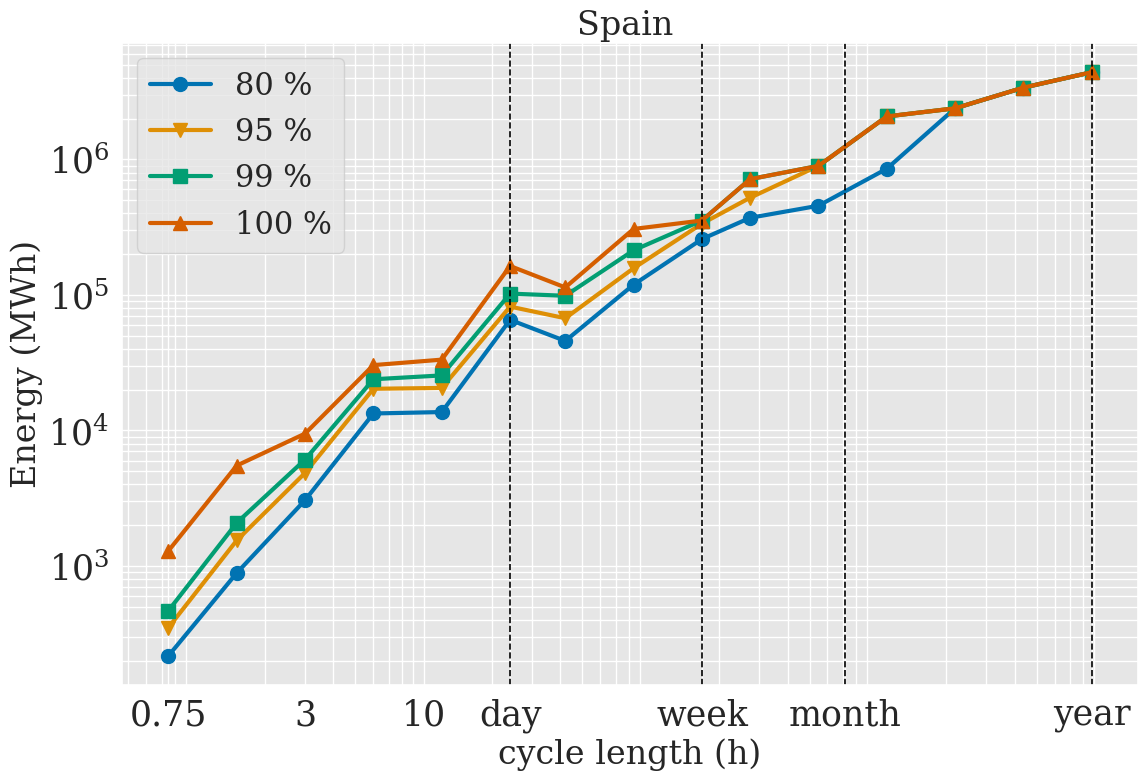

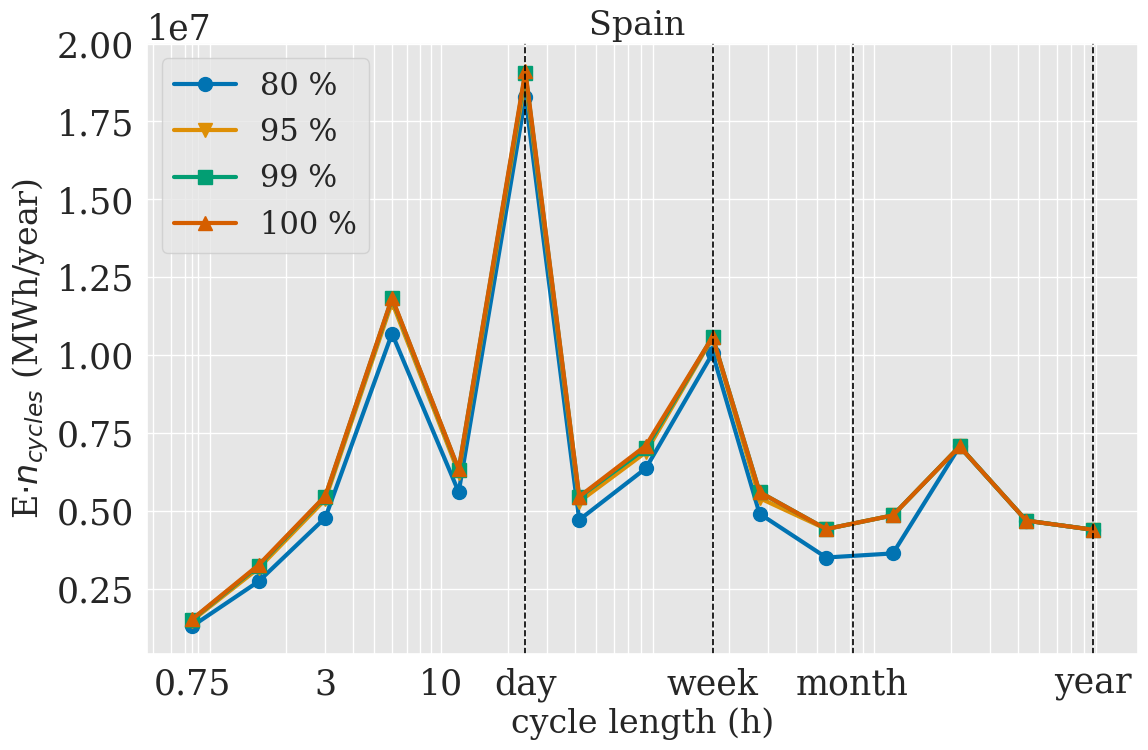

In [15]:
# An example for an extreme case : 100% of electricity is produced by PV
scenario_name = 'Spain '
#conso = stacked_betas_square['Consumption']
#prod =  stacked_betas_square['PV']

load_factor=54000

pmc = stacked_betas

satisfactions = [80,95,99,100] # Satisfaction rate
# Percentage of the t0000000ime the load will be met by the storage device.

satisfaction_labels = [str(satis)+'%' for satis in satisfactions]
# -------------------------------
# ------- Compute and plot E,P and N
#
results = calc_epn(pmc, satisfactions, time_scales, dpy, load_factor, shape = 'square')
plot_EPN(results['emax'], results['pmax'], results['n'], results['uf'], results['serv'],
         time_scales, satisfactions, scenario_name )

# Reconstructing and filtering signals

In [ ]:
#
# Importing Matrix for the reconstruction
year = '2013'

path_matrix = "saved_matrix\\square_shape\\"
# path_matrix = "saved_matrix\\sine_shape\\"
matrix_name = 'A_'+ year+'.npz'

A_sparse  = sparse.load_npz(path_matrix + matrix_name)
A = sparse.csr_matrix.todense(A_sparse)
matrix = np.asarray(A)
# #
reconstruct(time_scales, [12, 24],
                matrix,saved_sheets_square['PV'][year], "2013 PV signal filtered with 12h and 24h square wavelets",
                xmin=150, xmax=154,
                dpy=365, dpd=64,
                add_offset=True)

reconstruct(time_scales, [24],
                matrix,saved_sheets_square['PV'][year], "2013 PV signal filtered with 24h square wavelets",
                xmin=150, xmax=154,
                dpy=365, dpd=64,
                add_offset=True)

reconstruct(time_scales, time_scales,
                matrix,saved_sheets_square['PV'][year], "Reconstructed PV signal",
                xmin=0, xmax=365,
                dpy=365, dpd=64,
                add_offset=True)

# To translate or not translate ?
<br/>
<center> <bold> Results comparison with translations and without translations </bold></center>

In [ ]:
# -----------------------------------------------
# ------ Create translations full of zeros -----
# -----------------------------------------------
zero_trans = []
Nyears = int(len(stacked_input_data['Consumption'])/(ndpd*dpy) )
for i in range(Nyears):
    zero_trans.append([0,0,0])
    
# ----------------------------------------------------
# ------ Decomposition with without translations -----
# ----------------------------------------------------

path_matrix = "saved_matrix\\square_shape\\no_trans\\"
beta_path = "betas\\square_shape_no_trans\\"

stacked_betas_square_no_trans, saved_sheets_square_no_trans = compute_wavelet_coefficient_betas(time_series, stacked_input_data,
                 vy, vw, vd, dpy, ndpd, years,
                 zero_trans,
                 path_matrix,
                 beta_path, wl_shape ='square', imp_matrix = True)

pkl.dump([stacked_betas_square_no_trans, saved_sheets_square_no_trans], open('betas_saved_square_no_trans' + '.p', "wb"))

# [stacked_betas_square_no_trans, saved_sheets_square_no_trans] = pkl.load(open('betas_saved_square_no_trans' + '.p', "rb"))

In [ ]:
# --------------------------------------
# -- Same plots without translations ---
# --------------------------------------
scenario_name = 'PV, square wavelet decomposition without translation'
conso = stacked_betas_square_no_trans['Consumption']
prod =  stacked_betas_square_no_trans['PV']

pmc = [np.array(prod[i]) - np.array(conso[i]) for i in range(len(time_scales)) ]

satisfactions = [80,95,99,100]
satisfaction_labels = [str(satis)+'%' for satis in satisfactions]
# -------------------------------
# ------- Compute and plot E,P and N
#
results_square_PV_no_trans = calc_epn(pmc, satisfactions, time_scales, dpy, load_factor, shape = 'square')
plot_EPN(results_square_PV_no_trans['emax'], results_square_PV_no_trans['pmax'], results_square_PV_no_trans['n'], results_square_PV_no_trans['uf'], results_square_PV_no_trans['serv'],
         time_scales, satisfactions, scenario_name )

# Sine and square shape wavelets
<br/>
Wavelets can take various shapes. We used here both sine and square shape. Here is and example of a sine shape decomposition

In [ ]:
# -------- Import translations -----
trans_file = 'trans_sine_12_18'

trans_sine = load_trans(path_trans, trans_file,
                   stacked_input_data, 'Consommation',
                   ndpd, dpy, 
                   'sine', do_calc=False)
# ------Perform wavelet decomposition ----

beta_path = "betas\\sine_shape\\"

path_matrix = "saved_matrix\\sine_shape\\"

stacked_betas_sine, saved_sheets_sine = compute_wavelet_coefficient_betas(time_series, stacked_input_data,
                 vy,vw,vd,dpy, ndpd, years,
                 trans_sine,
                 path_matrix,
                 beta_path, wl_shape ='sine', imp_matrix = True)

# ----- Plot 100% PV scenario ---

scenario_name = 'PV, sine wavelet decomposition'
sine_conso = stacked_betas_sine['Consumption']
sine_prod =  stacked_betas_sine['PV']

sine_pmc = [np.array(sine_prod[i]) - np.array(sine_conso[i]) for i in range(len(time_scales)) ]

satisfactions = [80,95,99,100]
satisfaction_labels = [str(satis)+'%' for satis in satisfactions]
# -------------------------------
# ------- Compute and plot E,P and N
#
results_sine = calc_epn(sine_pmc, satisfactions, time_scales, dpy, load_factor, shape = 'sine')

In [ ]:
plot_EPN(results_sine['emax'], results_sine['pmax'], results_sine['n'], results_sine['uf'], results_sine['serv'],
         time_scales, satisfactions, scenario_name )

In [ ]:
# -------- Reconstruct signal -----

year = '2013'
path_matrix = "saved_matrix\\sine_shape\\"
matrix_name = 'A_'+ year+'.npz'

A_sparse  = sparse.load_npz(path_matrix + matrix_name)
A = sparse.csr_matrix.todense(A_sparse)
matrix = np.asarray(A)
# #
reconstruct(time_scales, [24],
                matrix,saved_sheets_sine['PV'][year], "Signal PV 2013 with 24 hours sine wavelets",
                xmin=0, xmax=15,
                dpy=365, dpd=64,
                add_offset=True)

reconstruct(time_scales, time_scales,
                matrix,saved_sheets_sine['PV'][year], "2013 PV signal reconsruction",
                xmin=0, xmax=365,
                dpy=365, dpd=64,
                add_offset=True)